<a href="https://colab.research.google.com/github/yogesh458/OnlinePaymentPrediction/blob/main/OnlinePaymentFraudDetcetion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The introduction of online payment systems has helped a lot in the ease of payments. But, at the same time, it increased in payment frauds. Online payment frauds can happen with anyone using any payment system, especially while making payments using a credit card. That is why detecting online payment fraud is very important for credit card companies to ensure that the customers are not getting charged for the products and services they never paid.



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Online Payments Fraud Detection with Machine Learning**

To identify online payment fraud with machine learning, we need to train a machine learning model for classifying fraudulent and non-fraudulent payments. For this, we need a dataset containing information about online payment fraud, so that we can understand what type of transactions lead to fraud.

Data: https://www.kaggle.com/ealaxi/paysim1/download

https://thecleverprogrammer.com/2022/02/22/online-payments-fraud-detection-with-machine-learning/#google_vignette

https://www.kaggle.com/datasets/ealaxi/banksim1


Below are all the columns from the dataset I’m using here:

step: represents a unit of time where 1 step equals 1 hour
type: type of online transaction
amount: the amount of the transaction
nameOrig: customer starting the transaction
oldbalanceOrg: balance before the transaction
newbalanceOrig: balance after the transaction
nameDest: recipient of the transaction
oldbalanceDest: initial balance of recipient before the transaction
newbalanceDest: the new balance of recipient after the transaction
isFraud: fraud transaction

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
data = pd.read_csv("/content/drive/MyDrive/PS_20174392719_1491204439457_log.csv")
print(data.head(10))

   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815      170136.00       160296.36   
1     1   PAYMENT   1864.28  C1666544295       21249.00        19384.72   
2     1  TRANSFER    181.00  C1305486145         181.00            0.00   
3     1  CASH_OUT    181.00   C840083671         181.00            0.00   
4     1   PAYMENT  11668.14  C2048537720       41554.00        29885.86   
5     1   PAYMENT   7817.71    C90045638       53860.00        46042.29   
6     1   PAYMENT   7107.77   C154988899      183195.00       176087.23   
7     1   PAYMENT   7861.64  C1912850431      176087.23       168225.59   
8     1   PAYMENT   4024.36  C1265012928        2671.00            0.00   
9     1     DEBIT   5337.77   C712410124       41720.00        36382.23   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0            0.00        0               0  
1  M2044282225            

#Data Visualization


In [ ]:
type = data["type"].value_counts()
transactions = type.index
quantity = type.values

import plotly.express as px
figure = px.pie(data,
             values=quantity,
             names=transactions,hole = 0.5,
             title="Distribution of Transaction Type")
figure.show()

[Text(0.5, 1.0, 'Distribution of Transaction Type')]

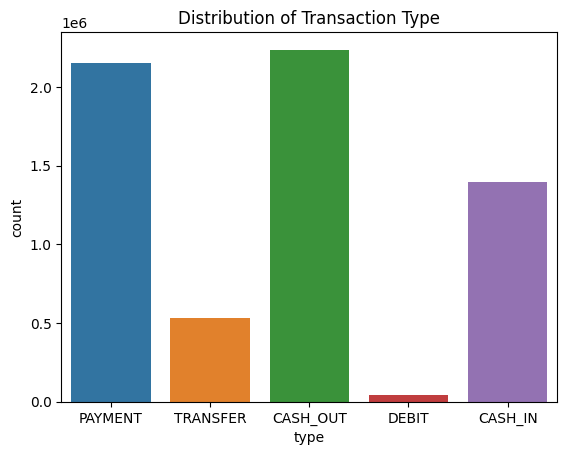

In [ ]:
sns.countplot(x='type', data=data).set(title="Distribution of Transaction Type")

#Data Preprocessing

In [ ]:
#let’s have a look at whether this dataset has any null values or not:
print(data.isnull().sum())

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


In [ ]:
#drop na rows
data.dropna(inplace = True)

In [ ]:
#let’s have a look at whether this dataset has any null values or not:
print(data.isnull().sum())

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


In [ ]:
data.drop('isFlaggedFraud', inplace=True, axis=1)

In [ ]:
#Before moving forward, now, let’s have a look at the type of transaction mentioned in the dataset:
# Exploring transaction type
print(data.type.value_counts())
data.shape

#{"CASH_OUT": 1, "PAYMENT": 2, "CASH_IN": 3, "TRANSFER": 4,"DEBIT": 5}


CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64


(6362620, 10)

#Correlation between features with isFraud column

In [ ]:
#Now let’s have a look at the correlation between the features of the data with the isFraud column:
# Checking correlation
correlation = data.corr()
print(correlation["isFraud"].sort_values(ascending=False))

<ipython-input-33-bc6fbf4c18b9>:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



isFraud           1.000000
amount            0.076688
step              0.031578
oldbalanceOrg     0.010154
newbalanceDest    0.000535
oldbalanceDest   -0.005885
newbalanceOrig   -0.008148
Name: isFraud, dtype: float64


#Data Transformation

Now let’s transform the categorical features into numerical. Here  transform the values of the isFraud column into No Fraud and Fraud labels to have a better understanding of the output:

In [ ]:
data["type"] = data["type"].map({"CASH_OUT": 1, "PAYMENT": 2,
                                 "CASH_IN": 3, "TRANSFER": 4,
                                 "DEBIT": 5})
data["isFraud"] = data["isFraud"].map({0: "No Fraud", 1: "Fraud"})
print(data.head())

   step  type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1     2   9839.64  C1231006815       170136.0       160296.36   
1     1     2   1864.28  C1666544295        21249.0        19384.72   
2     1     4    181.00  C1305486145          181.0            0.00   
3     1     1    181.00   C840083671          181.0            0.00   
4     1     2  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest   isFraud  
0  M1979787155             0.0             0.0  No Fraud  
1  M2044282225             0.0             0.0  No Fraud  
2   C553264065             0.0             0.0     Fraud  
3    C38997010         21182.0             0.0     Fraud  
4  M1230701703             0.0             0.0  No Fraud  


#Splitting the data into training and testing


In [ ]:
from sklearn.model_selection import train_test_split
x = np.array(data[["type", "amount", "oldbalanceOrg", "newbalanceOrig"]])
y = np.array(data[["isFraud"]])

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.10, random_state=42)

#Online Payments Fraud Detection Model

Now let’s train a classification model to classify fraud and non-fraud transactions.

#LogisticRegression
It predicts that the probability of a given data belongs to the particular category or not.

Logistic regression predicts the output of a categorical dependent variable. Therefore the outcome must be a categorical or discrete value. It can be either Yes or No, 0 or 1, true or False, etc. but instead of giving the exact value as 0 and 1, it gives the probabilistic values which lie between 0 and 1.

In [ ]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(xtrain, ytrain)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



LogisticRegression()

In [ ]:
print(model.score(xtrain, ytrain))

0.9994926967542023


In [ ]:
#Now let’s classify whether a transaction is a fraud or not by feeding about a transaction into the model:
# prediction
#features = [type, amount, oldbalanceOrg, newbalanceOrig]
features = np.array(xtest)
print("actual               predicted")
for i in range(60,100):
  print(ytest[i]+"            "+model.predict(features)[i])

actual               predicted
['No Fraud            No Fraud']
['No Fraud            No Fraud']
['No Fraud            No Fraud']
['No Fraud            No Fraud']
['No Fraud            No Fraud']
['No Fraud            No Fraud']
['No Fraud            No Fraud']
['No Fraud            No Fraud']
['No Fraud            No Fraud']
['No Fraud            No Fraud']
['No Fraud            No Fraud']
['No Fraud            No Fraud']
['No Fraud            No Fraud']
['No Fraud            No Fraud']
['No Fraud            No Fraud']
['No Fraud            No Fraud']
['No Fraud            No Fraud']
['No Fraud            No Fraud']
['No Fraud            Fraud']
['No Fraud            No Fraud']
['No Fraud            No Fraud']
['No Fraud            No Fraud']
['No Fraud            No Fraud']
['No Fraud            No Fraud']
['No Fraud            No Fraud']
['No Fraud            No Fraud']
['No Fraud            No Fraud']
['No Fraud            No Fraud']
['No Fraud            No Fraud']
['No Fraud     

In [ ]:
features = np.array([[4, 9000.00, 18000.00, 9000.0]])
print(model.predict(features))

['No Fraud']


#The Decision Tree Algorithm

A decision tree is a flowchart-like tree structure where an internal node represents a feature(or attribute), the branch represents a decision rule, and each leaf node represents the outcome.

The topmost node in a decision tree is known as the root node. It learns to partition on the basis of the attribute value. It partitions the tree in a recursive manner called recursive partitioning. This flowchart-like structure helps you in decision-making. It's visualization like a flowchart diagram which easily mimics the human level thinking. That is why decision trees are easy to understand and interpret.

https://www.datacamp.com/tutorial/decision-tree-classification-python



In [ ]:
# training a machine learning model
from sklearn.tree import DecisionTreeClassifier
model1 = DecisionTreeClassifier()
model1.fit(xtrain, ytrain)


DecisionTreeClassifier()

In [ ]:
print(model1.score(xtest, ytest))

0.9997375295082843


In [ ]:
print(model1.score(xtrain, ytrain))

0.9999998253689343


In [ ]:
#Now let’s classify whether a transaction is a fraud or not by feeding about a transaction into the model:

# prediction
#1-cash out
#2-payment
#3-cash in
#4-transfer
#5-debit
#features = [type, amount, oldbalanceOrg, newbalanceOrig]
features = np.array([[1, 1000, 4000, 000]])
print(model1.predict(features))


['Fraud']
